In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('data.csv')

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(array([0, 1]), <a list of 2 Text xticklabel objects>)

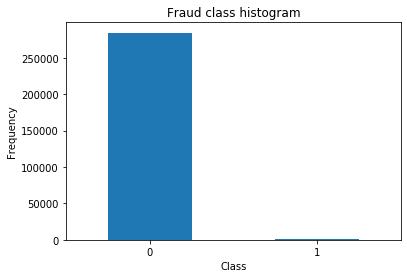

In [11]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

In [14]:
from sklearn.preprocessing import StandardScaler

data['norm_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [25]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [28]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Random selection of X samples from indices picked
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# Under sampling the dataset
under_sample_data = data.iloc[under_sample_indices, :]

X_undersample = under_sample_data.ix[:, under_sample_data.columns!='Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns=='Class']

# Showing ratio
print('Percentage of normal transactions: ', len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))
print('Percentage of fraud transactions: ', len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))
print('Total number of transactions in sampled data: ', len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in sampled data:  984


/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [29]:
from sklearn.model_selection import train_test_split

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print('Number of transactions in train dataset: ', len(X_train))
print('Number of transactions in test dataset: ', len(X_test))
print('Total number of transactions: ', len(X_train)+len(X_test))

#Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=0)

print('')
print('Number of transactions in train dataset: ', len(X_train_undersample))
print('Number of transactions in test dataset: ', len(X_test_undersample))
print('Total number of transactions: ', len(X_train_undersample)+len(X_test_undersample))


Number of transactions in train dataset:  199364
Number of transactions in test dataset:  85443
Total number of transactions:  284807

Number of transactions in train dataset:  688
Number of transactions in test dataset:  296
Total number of transactions:  984


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, auc, roc_curve, recall_score,  classification_report

In [114]:
# Ad hoc function to print k_fold scores

def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(n_splits=5, shuffle=False)
    
    # Different c parameters (hyperparameter for K-fold)
    c_param_range = [0.01, 0.1, 1, 10, 100]
    
    results_table = pd.DataFrame(index = range(len(c_param_range), 2), columns = ['C_parameter_r', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    # the. k-fold will gove 2 lists: train and test indices
    j=0
    for c_param in c_param_range:
        print('------------------------------------------')
        print('C parameter: ', c_param)
        print('------------------------------------------')
        print('')
        
        recall_accs=[]
        for iteration, indices in enumerate(fold.split(x_train_data), start=1):
            
            #Calling the logistic regression model
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear')
            
            lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
            
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            recall_acc = recall_score(y_train_data.iloc[indices[1], :].values, y_pred_undersample)
            
            recall_accs.append(recall_acc)
            print('Iteration ', iteration, ': recall_score = ', recall_acc)
            
        results_table.ix[j, 'Mean recall score'] = np.mean(recall_accs)
        
        j+=1
        print('')
        print('Mean recall score: ', np.mean(recall_accs))
        print('')
    
    
    best_c = results_table.loc[pd.to_numeric(results_table['Mean recall score']).idxmax()]['C_parameter']
    
    
    #Checking best c parameter
    
    print('********************************************************************************')
    print('Best c parameter : ', best_c)
    print('********************************************************************************')
    
    
    return best_c
            

In [115]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

------------------------------------------
C parameter:  0.01
------------------------------------------

Iteration  1 : recall_score =  0.9315068493150684
Iteration  2 : recall_score =  0.9178082191780822
Iteration  3 : recall_score =  0.9830508474576272
Iteration  4 : recall_score =  0.9864864864864865
Iteration  5 : recall_score =  0.9696969696969697

Mean recall score:  0.9577098744268469

------------------------------------------
C parameter:  0.1
------------------------------------------

Iteration  1 : recall_score =  0.8493150684931506
Iteration  2 : recall_score =  0.863013698630137
Iteration  3 : recall_score =  0.9322033898305084
Iteration  4 : recall_score =  0.9459459459459459
Iteration  5 : recall_score =  0.9090909090909091

Mean recall score:  0.8999138023981302

------------------------------------------
C parameter:  1
------------------------------------------

Iteration  1 : recall_score =  0.8493150684931506
Iteration  2 : recall_score =  0.8904109589041096
Itera

/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/mriganksingh/opt/anaconda3/lib/py

In [116]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    #For centering the values in the confusion matrix graph
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, no.newaxis]
    else:
        #print('Confusion matrix without normalization')
    
    
        thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
            color="white" if cm[i, j]  > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing. dataset:  0.9387755102040817


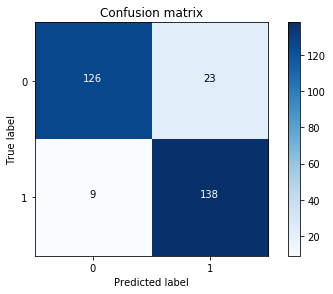

In [117]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)

print('Recall metric in the testing. dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

#Plot normalized confusion matrix
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in testing dataset:  0.9251700680272109


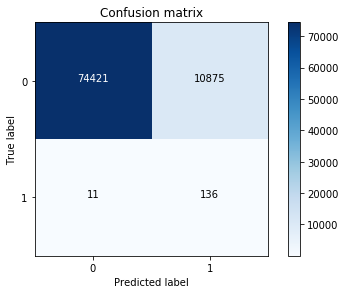

In [118]:
lr = LogisticRegression(C = best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

#Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Recall metric in testing dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

#Plot non-normalized confusion matrix
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

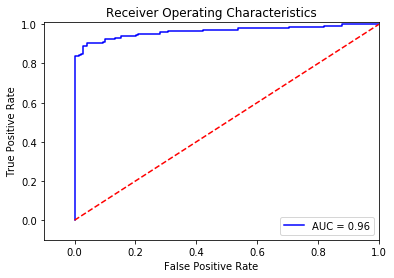

In [121]:
#ROC curve

lr = LogisticRegression(C = best_c, penalty='l1', solver='liblinear')
y_pred_undersample_score=lr.fit(X_train_undersample, y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(), y_pred_undersample_score)
roc_auc = auc(fpr, tpr)

#Plot ROC
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [122]:
best_c = printing_Kfold_scores(X_train, y_train)

------------------------------------------
C parameter:  0.01
------------------------------------------

Iteration  1 : recall_score =  0.4925373134328358
Iteration  2 : recall_score =  0.6027397260273972
Iteration  3 : recall_score =  0.6833333333333333
Iteration  4 : recall_score =  0.5692307692307692
Iteration  5 : recall_score =  0.45

Mean recall score:  0.5595682284048672

------------------------------------------
C parameter:  0.1
------------------------------------------



/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


Iteration  1 : recall_score =  0.5671641791044776
Iteration  2 : recall_score =  0.6164383561643836
Iteration  3 : recall_score =  0.6833333333333333
Iteration  4 : recall_score =  0.5846153846153846
Iteration  5 : recall_score =  0.525

Mean recall score:  0.5953102506435158

------------------------------------------
C parameter:  1
------------------------------------------



/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


Iteration  1 : recall_score =  0.5522388059701493
Iteration  2 : recall_score =  0.6164383561643836
Iteration  3 : recall_score =  0.7166666666666667
Iteration  4 : recall_score =  0.6153846153846154
Iteration  5 : recall_score =  0.5625

Mean recall score:  0.612645688837163

------------------------------------------
C parameter:  10
------------------------------------------



/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


Iteration  1 : recall_score =  0.5522388059701493
Iteration  2 : recall_score =  0.6164383561643836
Iteration  3 : recall_score =  0.7333333333333333
Iteration  4 : recall_score =  0.6153846153846154
Iteration  5 : recall_score =  0.575

Mean recall score:  0.6184790221704963

------------------------------------------
C parameter:  100
------------------------------------------



/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


Iteration  1 : recall_score =  0.5522388059701493
Iteration  2 : recall_score =  0.6164383561643836
Iteration  3 : recall_score =  0.7333333333333333
Iteration  4 : recall_score =  0.6153846153846154
Iteration  5 : recall_score =  0.575

Mean recall score:  0.6184790221704963

********************************************************************************
Best c parameter :  10.0
********************************************************************************


/Users/mriganksingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


Recall metric in testing dataset:  0.6190476190476191


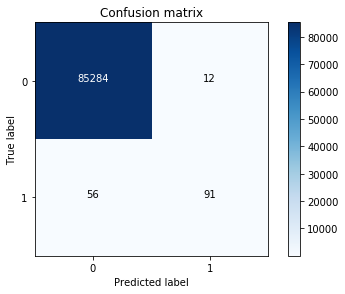

In [128]:
lr = LogisticRegression(C = best_c, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_undersample)
np.set_printoptions(precision=2)

print('Recall metric in testing dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

#Plot non-normalized confusion matrix
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in testing dataset:  1.0
Recall metric in testing dataset:  1.0
Recall metric in testing dataset:  1.0
Recall metric in testing dataset:  0.9795918367346939
Recall metric in testing dataset:  0.9387755102040817
Recall metric in testing dataset:  0.891156462585034
Recall metric in testing dataset:  0.8367346938775511
Recall metric in testing dataset:  0.782312925170068
Recall metric in testing dataset:  0.5850340136054422


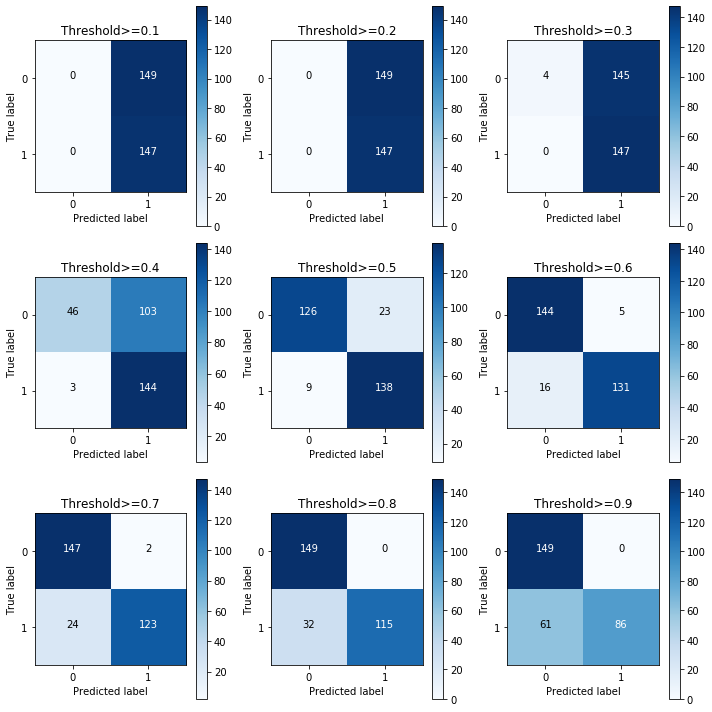

In [130]:
lr = LogisticRegression(C = 0.01, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10,10))

j=1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:, 1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    #Compute the confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print('Recall metric in testing dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    class_names=[0,1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold>=%s'%i)

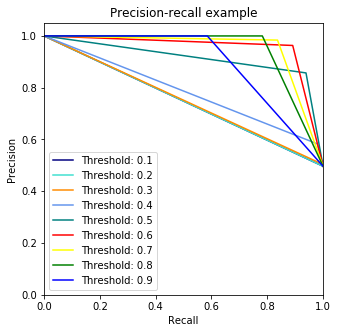

In [132]:
from itertools import cycle

lr = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue', 'black'])

plt.figure(figsize=(5,5))

j = 1
for i, color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample, y_test_predictions_prob)
    
    plt.plot(recall, precision, color=color, label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-recall example')
    plt.legend(loc='lower left')

In [5]:
data.shape

(284807, 31)